# Приоритизация гипотез и проведение А/В теста
В данном проекте мы проведем приоритизацию уже подготовленных гипотез, проведём А/В тест и проанлизируем его результаты.
- Для этого мы применим фреймворки ICE и RICE для приоритизации гипотез и сравним результаты.
- Построим кумулятивные графики выручки, среднего чека, среднего количества заказов на посетителя по группам. А также построим графики относительного изменения кумулятивного среднего чека и относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А.
- Затем посчитаем статистические значимости различий по "сырым" данным в среднем количестве заказов на посетителя и среднем чеке между группами.
- И наконец посчитаем статистические значимости различий по "ощищенным" данным в среднем количестве заказов на посетителя и среднем чеке между группами, предаврительно найдя аномальных пользователей.
- И в конце сделаем выводы о А/В тесте.

Описание данных

Данные для приоритизации:

Файл /datasets/hypothesis.csv. Скачать датасет

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для проведения А/В теста: 

Файл /datasets/orders.csv. Скачать датасет

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Приоритизация гипотез

<div style="border:solid green 2px; padding: 20px">
Откроем файл, изучим общую информацию и приведем названия столбцов к нижнему регистру, а также зададим ширину столбцов по содержимому

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [3]:
data = pd.read_csv('../datasets/hypothesis.csv')
data.columns = data.columns.str.lower()
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE 

In [4]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE'] = round(data['ICE'], 2)
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE

In [5]:
data['RICE'] = data['impact'] * data['confidence'] * data['reach'] / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Выводы по приоритизации

<div style="border:solid blue 2px; padding: 20px">
    При приотизиации методом ICE самой приоритетной оказазалась гипотеза 8, на втором и третьем местах 0 и 7 соответственно.
    При приотизиации методом RICE самой приоритетной оказазалась гипотеза 7, на втором и третьем местах 2 и 0 соответственно.
    Причем показатель RICE для 7 гипотезы в два раза выше, чем у 2. Приоритизация изменилась, в следствии учета в методе RICE охват пользователей, в отличии от ICE. Гипотеза 7 затронет намного больше пользователей, нежели 8.

## Анализ А/В теста

<div style="border:solid green 2px; padding: 20px">
Откроем файл, изучим общую информацию и преобразуем типы данных в столбцах со временем и приведем название столбцов к змеиному регистру

In [6]:
orders = pd.read_csv('../datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors = pd.read_csv('../datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace=True)
display(orders)
display(visitors)
orders.info()
visitors.info()
display(orders['group'].unique())
display('дата начала теста:', orders['date'].min())
display('дата конца теста:', orders['date'].max())
display(orders.groupby('group').agg({'visitor_id' : 'nunique'}))
orders_A = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
orders_B = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()
duplicates_users = np.intersect1d(orders_A, orders_B)
display('Количество пользователей, которые присутствуют в обеих группах:', len(duplicates_users))
display('Количество дубликатов в orders:', orders.duplicated().sum())
display('Количество дубликатов в visitors:', visitors.duplicated().sum())


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


array(['B', 'A'], dtype=object)

'дата начала теста:'

Timestamp('2019-08-01 00:00:00')

'дата конца теста:'

Timestamp('2019-08-31 00:00:00')

,visitor_id
group,
A,503
B,586


'Количество пользователей, которые присутствуют в обеих группах:'

58

'Количество дубликатов в orders:'

0

'Количество дубликатов в visitors:'

0

### Построим график кумулятивной выручки по группам

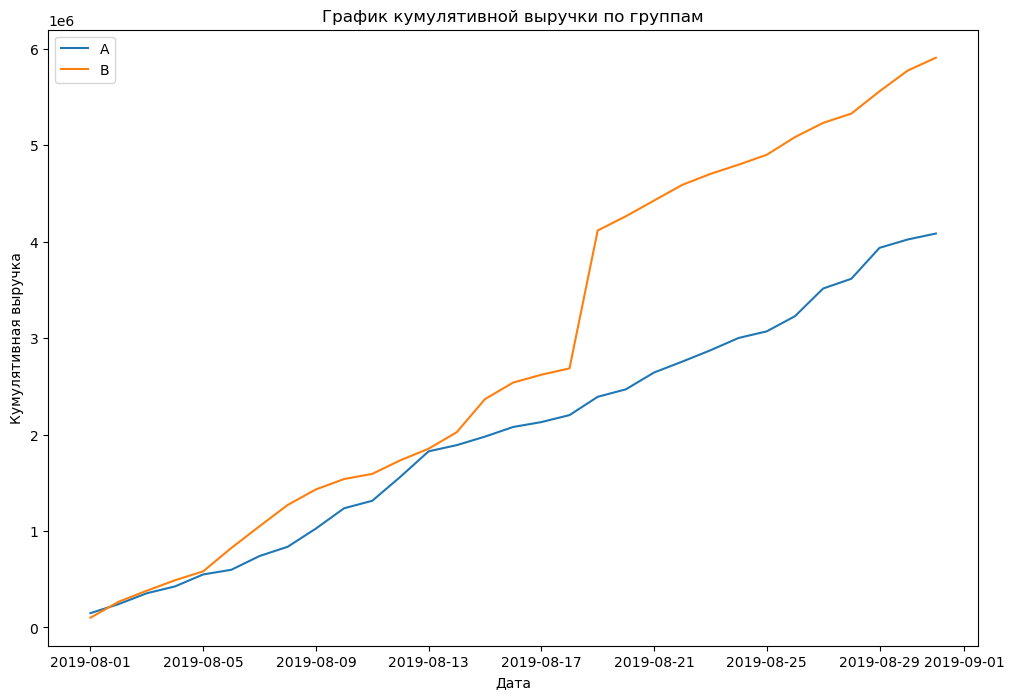

In [23]:
daily_orders_A = orders[orders['group'] == 'A'][['date', 'transaction_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
daily_orders_B = orders[orders['group'] == 'B'][['date', 'transaction_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
cumulitiv_orders_A = daily_orders_A.apply(lambda x: daily_orders_A[daily_orders_A['date'] <= x['date']].agg({'date' : 'max', 'transaction_id' : 'sum', 'revenue' : 'sum'}), axis=1).sort_values(by='date')
cumulitiv_orders_A.columns = ['date', 'orders', 'revenue']
cumulitiv_orders_B = daily_orders_B.apply(lambda x: daily_orders_B[daily_orders_B['date'] <= x['date']].agg({'date' : 'max', 'transaction_id' : 'sum', 'revenue' : 'sum'}), axis=1).sort_values(by='date')
cumulitiv_orders_B.columns = ['date', 'orders', 'revenue']
plt.figure(figsize=(12, 8))
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.plot(cumulitiv_orders_A['date'], cumulitiv_orders_A['revenue'], label='A')
plt.plot(cumulitiv_orders_B['date'], cumulitiv_orders_B['revenue'], label='B')
plt.legend();

<div style="border:solid blue 2px; padding: 20px">
    Судя по кумулятивным графиками выручки по группам, можно предположить что в группе В выручка стабильно больше, чем в группе А. Также виден скачок выручки в группе В, что говорит о возможно аномально высокой выручке или аномального числа заказов в эти даты.

### Построим график кумулятивного среднего чека по группам

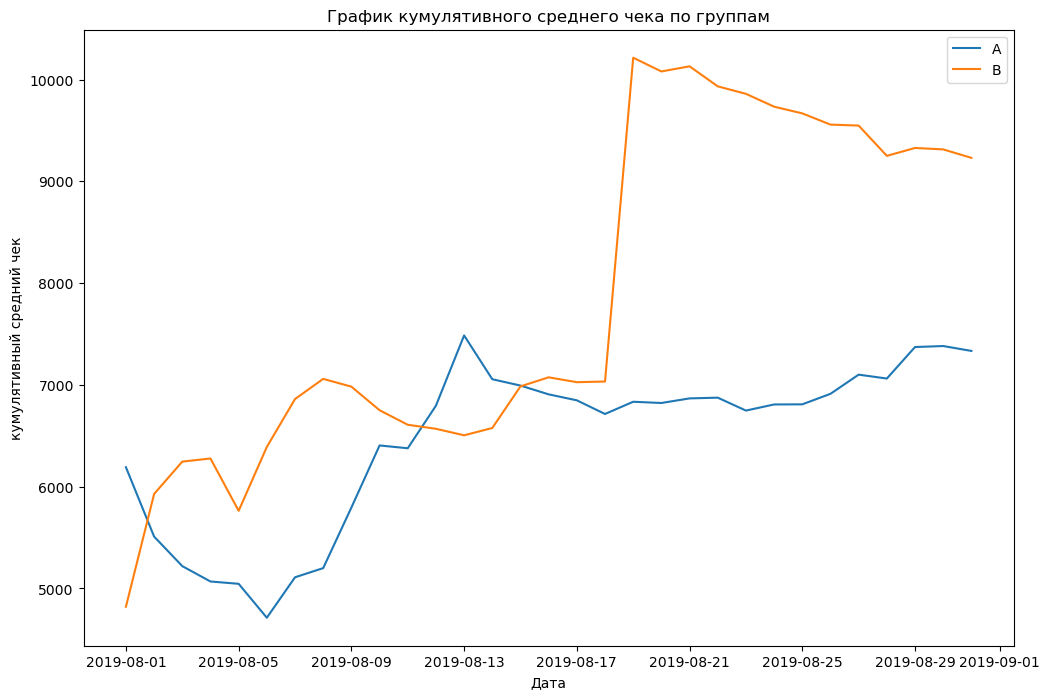

In [8]:
plt.figure(figsize=(12, 8))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("кумулятивный средний чек")
plt.plot(cumulitiv_orders_A['date'], cumulitiv_orders_A['revenue'] / cumulitiv_orders_A['orders'], label='A')
plt.plot(cumulitiv_orders_B['date'], cumulitiv_orders_B['revenue'] / cumulitiv_orders_B['orders'], label='B')
plt.legend();

<div style="border:solid blue 2px; padding: 20px">
    По графикам кумулятивного среднего чека по группам видно, что средний чек в группе В выше, чем в группе А. Правда не на протяжении всего время теста. А ещё резкий скачок среднего чего в группу В подтверждает предположение об аномально высокой выручке. Видимо в эти данные был один или несколько аномально дорогих заказов

### Построим график относительного изменения кумулятивного среднего чека группы В к группе А

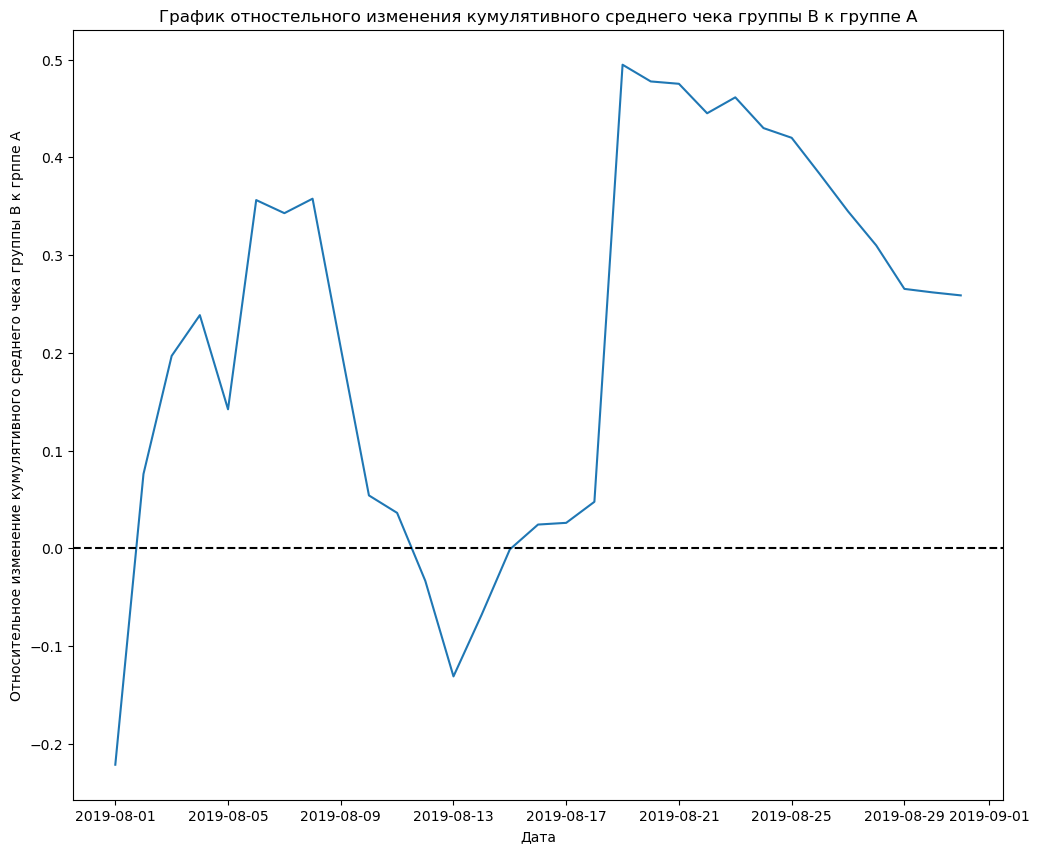

In [9]:
merged_cumulitiv_orders = cumulitiv_orders_A.merge(cumulitiv_orders_B, on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 10))
plt.title('График отностельного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение кумулятивного среднего чека группы В к грппе А")
plt.plot(merged_cumulitiv_orders['date'], (merged_cumulitiv_orders['revenueB'] / merged_cumulitiv_orders['ordersB']) / (merged_cumulitiv_orders['revenueA'] / merged_cumulitiv_orders['ordersA']) -1)
plt.axhline(y=0, color='black', linestyle='--');


<div style="border:solid blue 2px; padding: 20px">
    График относительного изменения кумулятивного среднего чека группы В к группе А подтерждает ранее озвученные выводы. Средний в группу В выше, чем в группе А, но не напротяжении всего времени. Также видно много резких скачков, что говорит об аномально больших заказах и выбросах. Ближе к концу теста заметно, что разницамежду средними чеками групп также сокращается.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

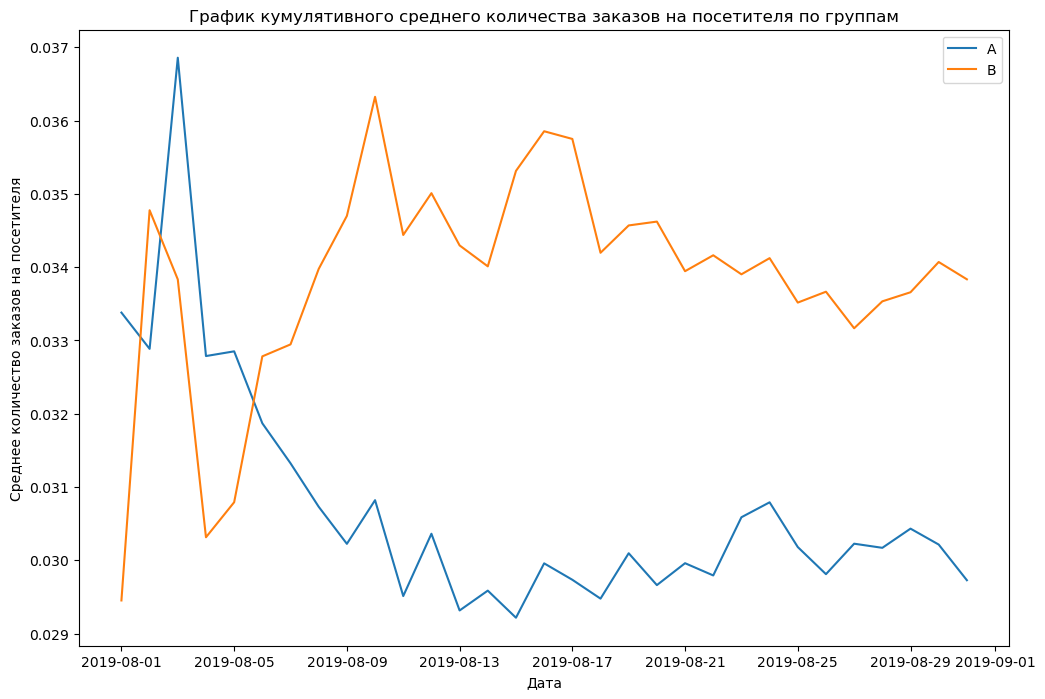

In [10]:

visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_A']
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_B']
cumulitiv_visitors_A = visitors_A.apply(lambda x: visitors_A[visitors_A['date'] <= x['date']].agg({'date' : 'max', 'visitors_A' : 'sum'}), axis=1).sort_values(by='date')
cumulitiv_visitors_B = visitors_B.apply(lambda x: visitors_B[visitors_B['date'] <= x['date']].agg({'date' : 'max', 'visitors_B' : 'sum'}), axis=1).sort_values(by='date')
cumulitiv_visitors = cumulitiv_visitors_A.merge(cumulitiv_visitors_B, on='date')
merged_cumulitiv = merged_cumulitiv_orders.merge(cumulitiv_visitors, on='date')
plt.figure(figsize=(12, 8))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов на посетителя")
plt.plot(merged_cumulitiv['date'], merged_cumulitiv['ordersA'] / merged_cumulitiv['visitors_A'], label='A')
plt.plot(merged_cumulitiv['date'], merged_cumulitiv['ordersB'] / merged_cumulitiv['visitors_B'], label='B')
plt.legend();



<div style="border:solid blue 2px; padding: 20px">
    Из графика  видно, что в начале теста среднее количество заказов на посетителя в группе А  было немного больше, но затем в группе В конверсия стала сильно больше.

### Построим график относительного изменения кумулятивного среднего количество заказов на поситителя группы В к группе А

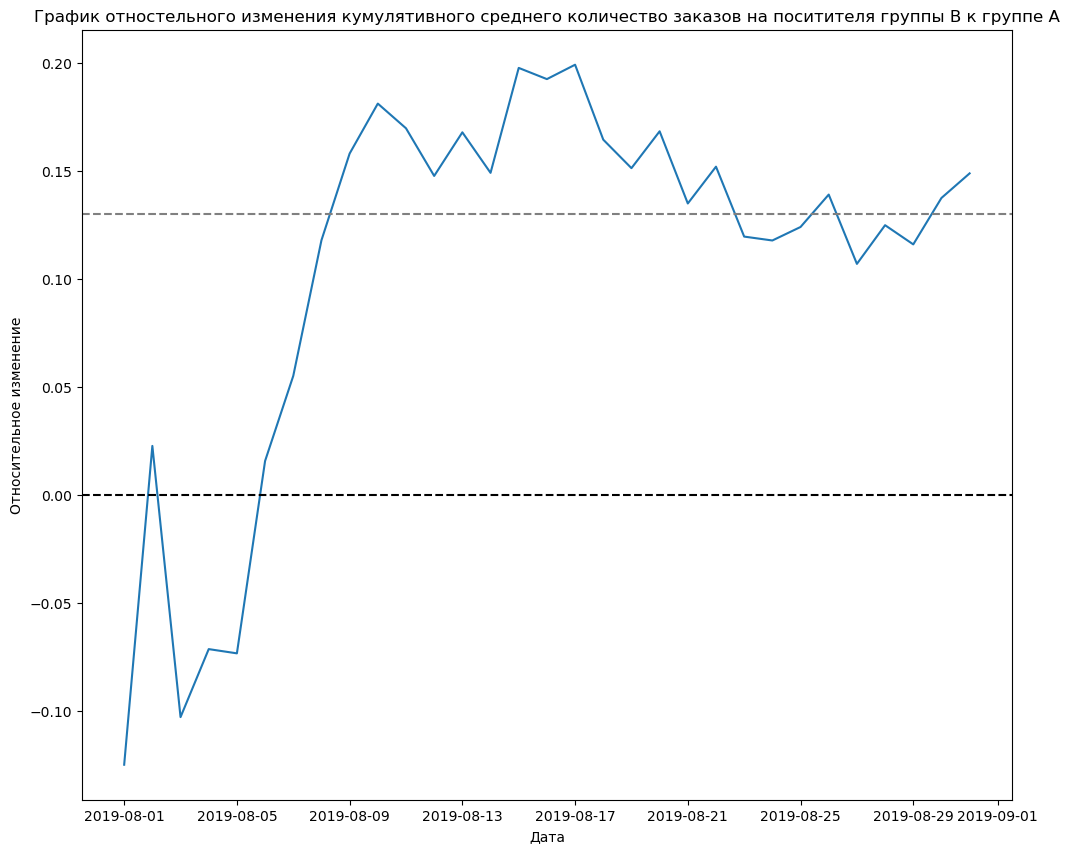

In [11]:
plt.figure(figsize=(12, 10))
plt.title('График отностельного изменения кумулятивного среднего количество заказов на поситителя группы В к группе А')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.plot(merged_cumulitiv_orders['date'], merged_cumulitiv_orders['ordersB'] / merged_cumulitiv_orders['ordersA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--');


<div style="border:solid blue 2px; padding: 20px">
    Сперва кумулятивное среднее количество заказов на посетителя группы В была ниже, но затем стала выше. Разница между ними к концу теста более менее зафиксировалась.

### Построим точечный график количества заказов на пользователя

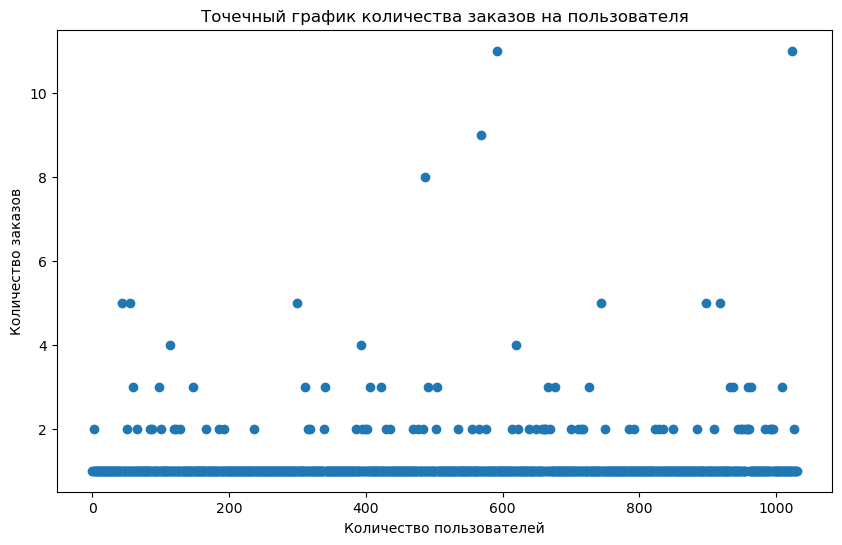

In [12]:
orders_by_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_user.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(orders_by_user)))
plt.figure(figsize=(10, 6))
plt.title('Точечный график количества заказов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.scatter(x_values, orders_by_user['orders']);

<div style="border:solid blue 2px; padding: 20px">
    Подавляющее большинство пользователей совершили всего 1 заказ. Доля совершивших 2 или 3 заказа, тоже существенна. Пользователей с 4 и более заказами совсем мало.

### Посчитаем 95-й и 99-й процентили количества заказов на пользователя

In [13]:
display(np.percentile(orders_by_user['orders'], [95, 99]))

array([2., 4.])

<div style="border:solid blue 2px; padding: 20px">
Установим верхнюю границу для не аномальных пользователей в 2 заказа.

### Построим точечный график стоимостей заказов

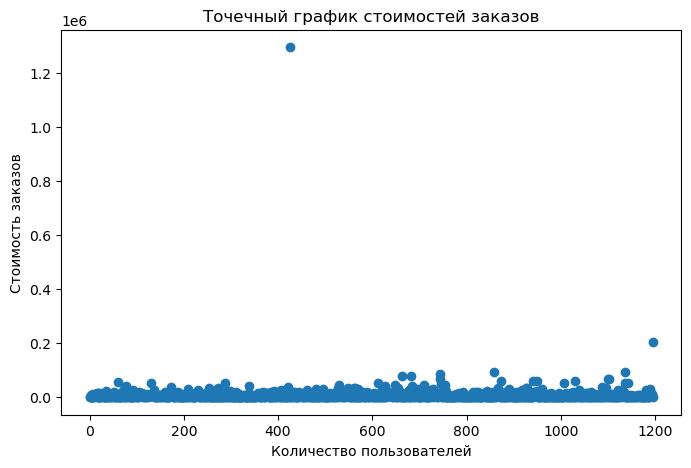

In [14]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(8, 5))
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов');

<div style="border:solid blue 2px; padding: 20px">
    На графике два огромных заказа, сильно выбивающихся из общей массы. Первый более 1.2 млн рублей, второй около 200 тыс рублей. Основная же масса заказов ниже 30 тыс рублей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [15]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

<div style="border:solid blue 2px; padding: 20px">
    Установим верхнюю границу для не аномальных заказов в 28000 рублей. Так мы сможем сохранить 95% заказов и избавиться от самых аномально дорогих заказов

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным.

<div style="border:solid green 2px; padding: 20px">
    Нулевая гипотеза: Среднее количество заказов на посетителя в группе В по "сырым" данным, равно среднему количеству заказов на посетителя в группе А по "сырым" данным.
    Альтернативная гипотеза: Среднее количество заказов на посетителя в группе В по "сырым" данным, не равно среднему количеству заказов на посетителя в группе А по "сырым" данным.
    Гипотезы будем проверять с помощью критерия Уилкоксона-Манна-Уитни. Используем именно этот критерий, по причине больших выбросов данных ( в сравнении с нормальным распределением), так как этот критерей является не параметрическим.
    Критический уровень статистической значимости установим 0.05.

In [16]:
orders_by_user_A = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_user_A.columns = ['visitor_id', 'orders']
orders_by_user_B = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_user_B.columns = ['visitor_id', 'orders']
visitors_per_date_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_per_date_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
sample_A = pd.concat(
    [
        orders_by_user_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_A['visitors'].sum() - len(orders_by_user_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sample_B = pd.concat(
    [
        orders_by_user_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_B['visitors'].sum() - len(orders_by_user_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
display('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
display('Относительная разница между группами по среднему количеству заказов:', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

'p-value:'

'0.017'

'Относительная разница между группами по среднему количеству заказов:'

'0.138'

<div style="border:solid blue 2px; padding: 20px">
    Исходя из сырых данных по среденему количеству заказов на пользователя, можно сделать вывод, что статистически значимая разница между группами существует, так как p-value меньше 0.05. Причем разница между их средними - 13.8%

### Посчитаем статистическую значимость различий в среднем чеке заказов  между группами по "сырым" данным.

<div style="border:solid green 2px; padding: 20px">
    Нулевая гипотеза: Средней чек в группе В по "сырым" данным, равен среднему чеку в группе А по "сырым" данным.
    Альтернативная гипотеза: Средней чек в группе В по "сырым" данным, не равен среднему чеку в группе А по "сырым" данным.
    Гипотезы будем проверять с помощью критерия Уилкоксона-Манна-Уитни. Используем именно этот критерий, по причине больших выбросов данных ( в сравнении с нормальным распределением), так как этот критерей является не параметрическим.
    Критический уровень статистической значимости установим 0.05.

In [17]:
display('p-value:', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
display('Относительная разница между группами по среднему чеку:', "{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))


'p-value:'

'0.729'

'Относительная разница между группами по среднему чеку:'

'0.259'

<div style="border:solid blue 2px; padding: 20px">
Исходя из сырых данных по среденему чеку, можно сделать вывод, что статистически значимой разницы между группами не существует, так как p-value сильно больше 0.05, несмотря на то, что средний чек по "сырым" данным в группе В вырос. 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным.

<div style="border:solid green 2px; padding: 20px">
    Создадим таблицу с аномальными пользователями

In [18]:
users_many_orders = pd.concat(
    [
        orders_by_user_A[orders_by_user_A['orders'] > np.percentile(orders_by_user['orders'], 95)]['visitor_id'],
        orders_by_user_B[orders_by_user_B['orders'] > np.percentile(orders_by_user['orders'], 95)]['visitor_id']
        
    ],
    axis=0
)
users_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates()

<div style="border:solid green 2px; padding: 20px">
    Посчитаем потери пользователей, после фильтрации

In [19]:
display('Количество аномальных пользователей', len(abnormal_users))
display('Доля аномальных пользователей', round(len(abnormal_users) / len(orders['visitor_id'].unique()), 3))

'Количество аномальных пользователей'

74

'Доля аномальных пользователей'

0.072

<div style="border:solid blue 2px; padding: 20px">
    Отфильтровав аномальных пользователей, мы потеряли 7,2% всех пользователей

### Посчитаем статистическую значимость различий в среднем количестве  заказов на посетителя  между группами по "очищенным" данным.

<div style="border:solid green 2px; padding: 20px">
    Нулевая гипотеза: Среднее количество заказов на посетителя в группе В по "очищенным" данным, равно среднему количеству заказов на посетителя в группе А по "сырым" данным.
    Альтернативная гипотеза: Среднее количество заказов на посетителя в группе В по "очищенным" данным, не равно среднему количеству заказов на посетителя в группе А по "сырым" данным.
    Гипотезы будем проверять с помощью критерия Уилкоксона-Манна-Уитни. Используем именно этот критерий, по причине больших выбросов данных ( в сравнении с нормальным распределением), так как этот критерей является не параметрическим.
    Критический уровень статистической значимости установим 0.05.

In [20]:
sample_filtred_A = pd.concat(
    [
        orders_by_user_A[np.logical_not(orders_by_user_A['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_A['visitors'].sum() - len(orders_by_user_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sample_filtred_B = pd.concat(
    [
        orders_by_user_B[np.logical_not(orders_by_user_B['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_B['visitors'].sum() - len(orders_by_user_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
display('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sample_filtred_A, sample_filtred_B)[1]))
display('Относительная разница между группами по среднему количеству заказов:', "{0:.3f}".format(sample_filtred_B.mean() / sample_filtred_A.mean() - 1))

'p-value:'

'0.013'

'Относительная разница между группами по среднему количеству заказов:'

'0.173'

<div style="border:solid blue 2px; padding: 20px">
    Исходя из ощищенных данных по среденему количеству заказов на пользователя, можно сделать вывод, что статистически значимая разница между группами существует, так как p-value меньше 0.05. Причем разница между их средними - 17,3%. Относительно "сырых" данных p-value немного уменьшился, а разница между средними увеличилась на 3,5%.

### Посчитаем статистическую значимость различий в среднем чеке заказов  между группами по "очищенным" данным.


<div style="border:solid green 2px; padding: 20px">
    Нулевая гипотеза: Средний чек в группе В по "очищенным" данным, равен среднему чеку в группе А по "очищенным" данным.
    Альтернативная гипотеза: Средний чек в группе В по "очищенным" данным, не равен среднему чеку в группе А по "очищенным" данным.
    Гипотезы будем проверять с помощью критерия Уилкоксона-Манна-Уитни. Используем именно этот критерий, по причине больших выбросов данных ( в сравнении с нормальным распределением), так как этот критерей является не параметрическим.
    Критический уровень статистической значимости установим 0.05.

In [21]:
display('p-value:', 
    "{0:.3f}".format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                       orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]
    )
)
display('Относительная разница между группами по среднему чеку:', 
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() /
        orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1
        )
)

'p-value:'

'0.738'

'Относительная разница между группами по среднему чеку:'

'-0.020'

<div style="border:solid blue 2px; padding: 20px">
Исходя из "ощищенных" данных по среденему чеку, по прежнему можно сделать вывод, что статистически значимой разницы между группами не существует, так как p-value по прежнему сильно больше 0.05 (близко к 1),  средний чек по "ощищенным" данным в группе В практически равен среднему чеку в группе А. Относительно "сырых" данных p-value незначительно увеличился, а вот разница между средним чеком групп сильно сократилась.

### Вывод
<div style="border:solid blue 2px; padding: 20px">
Исходя из результатов можно сдлеать следующие выводы:
Среднее количество заказов на пользователя в группах имеет статистически значимую разницу, как в "сырых" так и в "ощищенных" данных.
Средний чек в группах не имеет статистически значимой разницы, как в "сырых" так и в "ощищенных" данных. Также  средний чек в группе В по "ощищенным" данным примерно такой же, как в группе А.  
По графикам среднего количество заказов на посетителя также можно сделать вывод о том, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
По графику средних чеков сложно делать выводы, так как имелись большие выбросы. 
В связи с выше изложенным, считаю что тест можно остановить, и зафиксировать победу группы В, не смотря на отсутсвие статистически значимой разницы среднего чека, так как есть точное понимание серьезного роста количества заказов на пользователя.